In [27]:
import mne
import os
import os.path as op
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import re
import glob
from scipy import stats
import copy
import statsmodels.stats.multitest as mul

In [2]:
raw = mne.io.read_raw_brainvision("D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr", preload=True)
raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})
raw.set_montage(montage='standard_1020')

events = mne.read_events('D:/hse/psychodelic_like_experience/data_processing/events/AS32_eve.txt')
epochs = mne.Epochs(raw, events, tmin=0, tmax=0.006, baseline=None, preload = True)
evoked = epochs.average()

Extracting parameters from D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr...
Setting channel info structure...
Reading 0 ... 802799  =      0.000 ...  1605.598 secs...


C:\Users\User\AppData\Local\Temp\ipykernel_10360\1190752135.py:2: RuntimeWarning: The unit for channel(s) KGR, pletism has changed from V to NA.
  raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 4 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [28]:
def space_fdr(p_val_n):
    #print(p_val_n.shape)
    temp = copy.deepcopy(p_val_n)
    for i in range(temp.shape[1]):
        _, temp[:,i] = mul.fdrcorrection(p_val_n[:,i])
    return temp
def full_fdr(p_val_n):
    s = p_val_n.shape
    #print(p_val_n.shape)
    temp = copy.deepcopy(p_val_n)
    pval = np.ravel(temp)
    _, pval_fdr = mul.fdrcorrection(pval)
    pval_fdr_shape = pval_fdr.reshape(s)
    return pval_fdr_shape

In [3]:
evoked.data = np.zeros((28, 4))

In [43]:
delta = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_delta_HCCC_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
theta = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_theta_HCCC_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
alpha = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_alpha_HCCC_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
beta = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_beta_HCCC_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()

#evoked.data = np.array(stats.p_value
delta.columns = ['sensor', 'hyper', 'color', 'hyper_color']
theta.columns = ['sensor', 'hyper', 'color', 'hyper_color']
alpha.columns = ['sensor', 'hyper', 'color', 'hyper_color']
beta.columns = ['sensor', 'hyper', 'color', 'hyper_color']

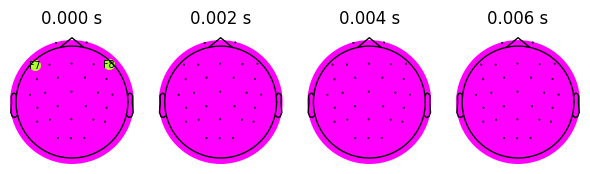

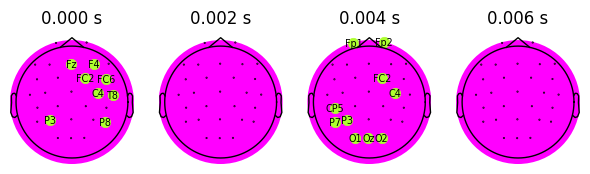

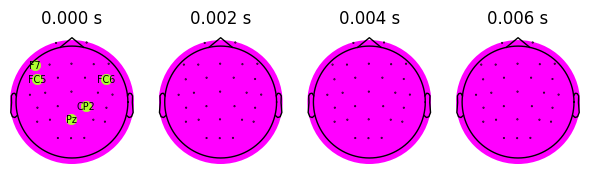

In [44]:
stats = ['hyper',	'color',	'hyper_color']

for stat in stats:
    col4_array = delta[stat].values
    col1_array = theta[stat].values
    col2_array = alpha[stat].values
    col3_array = beta[stat].values
    # Stack the arrays vertically to create a single array
    combined_array = np.stack((col4_array, col1_array, col2_array, col3_array), axis=1)
    combined_array = space_fdr(combined_array)
    threshold = 0.05
    bool_array = np.array(combined_array) < threshold
    mask_params=dict(marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', linewidth=0, markersize=15)
    fig = evoked.plot_topomap(times = evoked.times, ch_type='eeg',sensors=True, show_names=True, mask=bool_array.reshape(28, 4), cmap='spring', colorbar=False, mask_params=mask_params, show=True)
    titles = [ "delta", "theta" , "alpha" , "beta" ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f"{stat} HC vs CC",  fontsize=15, fontweight='bold')
    
    fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/new_model/{stat}_base_norm_HC_CC.png')

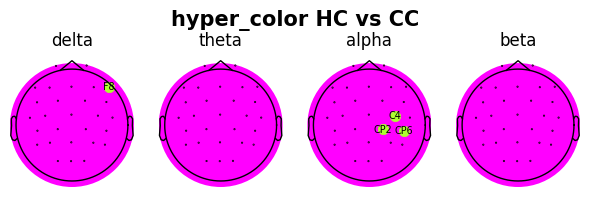

In [6]:
fig

In [45]:
delta = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_delta_kf_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
theta = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_theta_kf_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
alpha = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_alpha_kf_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()
beta = pd.read_csv('D:/hse/psychodelic_like_experience/data_processing/stats/aov_results_beta_kf_norm_base.csv').pivot_table(index='sensor', columns='rn', values='p_value', aggfunc='first', sort=False).reset_index()

#evoked.data = np.array(stats.p_value
delta.columns = ['sensor', 'hyper', 'color', 'hyper_color']
theta.columns = ['sensor', 'hyper', 'color', 'hyper_color']
alpha.columns = ['sensor', 'hyper', 'color', 'hyper_color']
beta.columns = ['sensor', 'hyper', 'color', 'hyper_color']

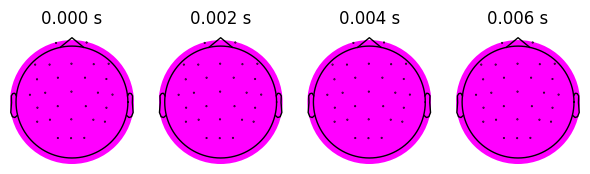

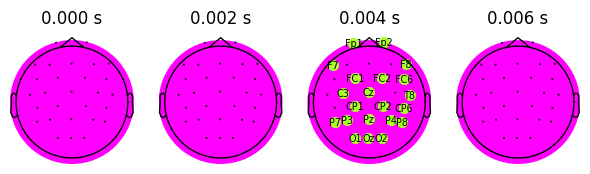

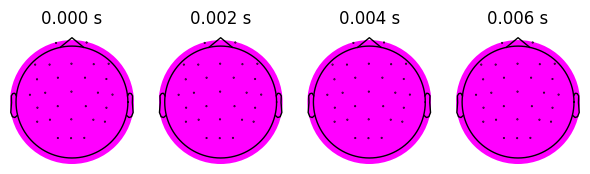

In [46]:
stats = ['hyper',	'color',	'hyper_color']

for stat in stats:
    col4_array = delta[stat].values
    col1_array = theta[stat].values
    col2_array = alpha[stat].values
    col3_array = beta[stat].values
    # Stack the arrays vertically to create a single array
    combined_array = np.stack((col4_array, col1_array, col2_array, col3_array), axis=1)
    combined_array = space_fdr(combined_array)
    threshold = 0.05
    bool_array = np.array(combined_array) < threshold
    mask_params=dict(marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', linewidth=0, markersize=15)
    fig = evoked.plot_topomap(times = evoked.times, ch_type='eeg',sensors=True, show_names=True, mask=bool_array.reshape(28, 4), cmap='spring', colorbar=False, mask_params=mask_params, show=True)
    titles = [ "delta", "theta" , "alpha" , "beta" ]
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig.suptitle(f"{stat} F vs k",  fontsize=15, fontweight='bold')
    
    fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/new_model/{stat}_base_norm_Fk.png')

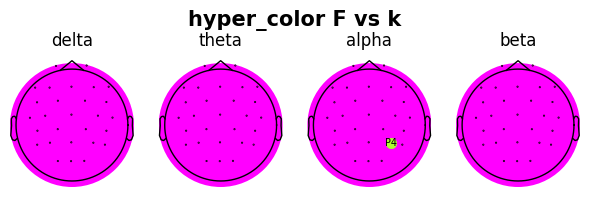

In [12]:
fig